# Homework #3: Uncertainty Ellipses, Profiled Log Likelihoods, and MH-MCMC 

Janelle Sy

October 24, 2022

## Problem 1:

***Go back to problem 1 of Problem Set 1. Plot the best-fit slope m and intercept b, along with the one-sigma uncertainty ellipse implied by the standard error (covariance matrix) for this linear fitting problem. Then, for comparison, plot the same for problem 2 of Problem Set 1. Comments?***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import scipy
from scipy import stats
import random

import pickle as pkl
from scipy import optimize

To find the best-fitting slope m and intercept b we did:

$\left[\begin{array}{ccc}b \\ m\end{array}\right] = X = [A^{T}C^{-1}A]^{-1}[A^{T}C^{-1}Y]$

We got our standard error by:

$[A^{T}C^{-1}A]^{-1}$

which also implies

$ [A_{1} A_{2}]\left[\begin{array}{ccc} A_{1}/\sigma_{1}^{2} \\ A_{2}/\sigma_{2}^{2} \end{array}\right] = \left(\frac{A_{1}}{\sigma_{1}^{2}}\right)^{2} + \left(\frac{A_{2}}{\sigma_{2}^{2}}\right)^{2}$

aka the equation of an ellipse.


From Problem Set 1, my best-fit slope m and intercept b values respectively were $\approx 34.048$ & $2.240.$ Let's extract the data from Problemset 1:


In [2]:
data_1 = np.loadtxt('data.txt')
x_1 = data_1[:,0][4:]
y_1 = data_1[:,1][4:]
sigma_y1 = data_1[:,2][4:]

In [3]:
def linalg_linearfit(x, y, sigma_y):
    """Defining a function that will calculate the best fit values for 
    parameters b & m for a linear line"""
    
    Y = np.reshape(y,(len(y),1))

    A = np.ones(len(x))
    A = np.column_stack([A, x])

    C = np.diag(sigma_y**2)
    C_inv = np.linalg.solve(C, np.identity(len(x)))
    X = np.linalg.inv(np.transpose(A)@C_inv@A)@np.transpose(A)@C_inv@Y
    variance = np.linalg.inv(np.transpose(A)@C_inv@A)
    
    print('the best fit b and m values respectively are:', X[0][0], '&', X[1][0])
    print('the variance for the b and m values respectively are:', np.sqrt(variance[0][0]), '&', np.sqrt(variance[1][1]))

    return X, variance ### this is where we calculate b and m

In [4]:
results_1 = linalg_linearfit(x_1, y_1, sigma_y1)
cov_matrix1 = results_1[1]

bestfit_m1 = results_1[0][1]
bestfit_b1 = results_1[0][0]

sigma_m1 = results_1[1][0][1]
sigma_b1 = results_1[1][1][0]
print(cov_matrix1)

the best fit b and m values respectively are: 34.04772775754262 & 2.239920831631094
the variance for the b and m values respectively are: 18.246166749268173 & 0.10778047654050076
[[ 3.32922601e+02 -1.88954491e+00]
 [-1.88954491e+00  1.16166311e-02]]


and extract the data from #2 of Problemset 1:

In [5]:
# Load data
data_2 = np.loadtxt('data.txt')
x_2 = data_2[:,0]
y_2 = data_2[:,1]
sigma_y2 = data_2[:,2]

results_2 = linalg_linearfit(x_2, y_2, sigma_y2)
cov_matrix2 = results_2[1]

bestfit_m2 = results_2[0][1]
bestfit_b2 = results_2[0][0]

sigma_m2 = results_2[1][0][1]
sigma_b2 = results_2[1][1][0]

print(cov_matrix2)

the best fit b and m values respectively are: 213.2734919759613 & 1.0767475241683286
the variance for the b and m values respectively are: 14.39403310716221 & 0.0774067831657561
[[ 2.07188189e+02 -1.05427206e+00]
 [-1.05427206e+00  5.99181008e-03]]


We can make a covariance ellipse from the eigenvalues and eigenvectors of our covariance matrix:

Eigen values =  [3.32933325e+02 8.92247912e-04]
Eigen vectors =  [[ 0.99998389  0.00567555]
 [-0.00567555  0.99998389]]
theta = -0.005675582504341151
angle = -0.3251869237770382


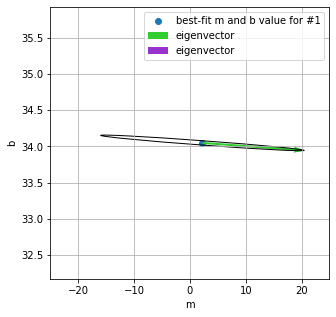

In [6]:
# Close up of #1

fig = plt.figure(figsize = (5,5))
ax = plt.gca()
plt.scatter(bestfit_m1, bestfit_b1, label = 'best-fit m and b value for #1')

# find eigenvectors and eigenvalues of our covariance matrix
cov_matrix1 = results_1[1]
evalues1, evectors1 = np.linalg.eig(cov_matrix1)
theta1 = np.arctan2(evectors1[:,0][1],evectors1[:,0][0])

print('Eigen values = ', evalues1)
print('Eigen vectors = ', evectors1)

print('theta =', theta1)
print('angle =', np.degrees(theta1))

width1 = 2*np.sqrt(evalues1[0])
height1 = 2*np.sqrt(evalues1[1])

plt.quiver(bestfit_m1, bestfit_b1, np.sqrt(evalues1[0])*evectors1[0][0], np.sqrt(evalues1[0])*evectors1[1][0], angles='xy', scale_units='xy', scale=1, color = 'limegreen',label = 'eigenvector')
plt.quiver(bestfit_m1, bestfit_b1, np.sqrt(evalues1[1])*evectors1[0][1], np.sqrt(evalues1[1])*evectors1[1][1], angles='xy', scale_units='xy', scale=1, color = 'darkorchid',label = 'eigenvector')

# add covariance error ellipse implied by our standard error
ellipse1 = Ellipse((bestfit_m1, bestfit_b1), width = width1, height = height1, angle = np.degrees(theta1), fill = False)
ax.add_artist(ellipse1)


plt.xlim(-25,25)
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.grid()
plt.legend()
plt.show()

Eigen values =  [2.07193554e+02 6.27156119e-04]
Eigen vectors =  [[ 0.99998705  0.00508843]
 [-0.00508843  0.99998705]]
theta = -0.005088447154673177
angle = -0.2915465462381255
14.394033106598144 -0.0732439089575844
0.00012742986599622558 0.025042761043532508


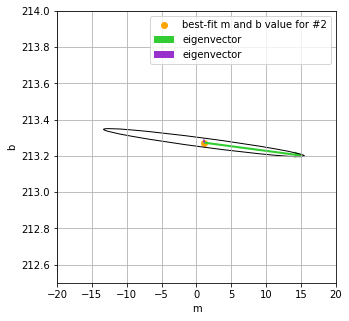

In [7]:
# Close up of #2

fig = plt.figure(figsize = (5,5))
ax = plt.gca()
plt.scatter(bestfit_m2, bestfit_b2, color = 'orange', label = 'best-fit m and b value for #2')

# find eigenvectors and eigenvalues of our covariance matrix
cov_matrix2 = results_2[1]
evalues2, evectors2 = np.linalg.eig(cov_matrix2)
theta2 = np.arctan2(evectors2[:,0][1],evectors2[:,0][0])

print('Eigen values = ', evalues2)
print('Eigen vectors = ', evectors2)
print('theta =', theta2)
print('angle =', np.degrees(theta2))

print(np.sqrt(evalues2[0])*evectors2[0][0], np.sqrt(evalues2[0])*evectors2[1][0])
print(np.sqrt(evalues2[1])*evectors2[0][1], np.sqrt(evalues2[1])*evectors2[1][1])

width2 = 2*np.sqrt(evalues2[0])
height2 = 2*np.sqrt(evalues2[1])

#eigenvectors also scaled by a factor of 10 to see the directions more obviously
plt.quiver(bestfit_m2, bestfit_b2, np.sqrt(evalues2[0])*evectors2[0][0], np.sqrt(evalues2[0])*evectors2[1][0], angles='xy', scale_units='xy', scale=1, color = 'limegreen', label = 'eigenvector')
plt.quiver(bestfit_m2, bestfit_b2, np.sqrt(evalues2[1])*evectors2[0][1], np.sqrt(evalues2[1])*evectors2[1][1], angles='xy', scale_units='xy', scale=1, color = 'darkorchid', label = 'eigenvector')


# add covariance error ellipse implied by our standard error
ellipse2 = Ellipse(xy = (bestfit_m2, bestfit_b2), width = width2, height = height2, angle = np.degrees(theta2), fill = False)

ax.add_patch(ellipse2)

plt.xlim(-20,20)
plt.ylim(212.5,214)
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.grid()
plt.legend()
plt.show()

## Problem 2:

***Go back to problem 2 of Problem Set 2. What is the standard uncertainty on the period T of the second signal in data set 11 (the last of the 11 data sets)? Get this standard error by an analysis of the profile likelihood, profiling out all other parameters (including all amplitudes).***

 From problem 2 of PS #2, we found the second signal in dataset #11 to appear at a period T = 256 days

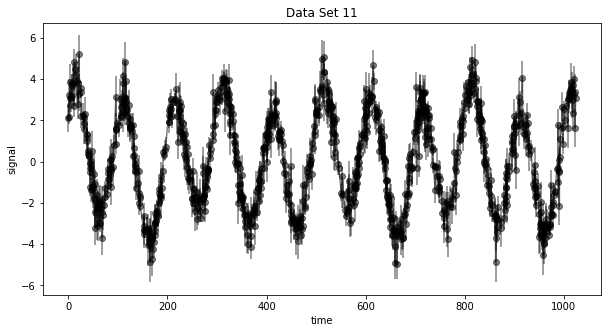

In [8]:
with open("data.pkl", "rb") as handle:
    data = pkl.load(handle).T
    
# data[0] is the array of times 
# data[1] is the array of uncertainties 
time = data [0]
sigma_y = data[1]
y = data[12]


plt.figure(figsize=(10, 5))
plt.errorbar(time, y, yerr = sigma_y, color="k", marker="o", alpha=0.5)
plt.xlabel('time')
plt.ylabel('signal')
plt.title('Data Set 11')
plt.show()

In [9]:
# optimize nuisance parameter (period in this case)
# solving thru brute force

def pro_likelihood(T, time, y, sigma_y):
    T_0 = 100 #days 
    Y = np.reshape(y,(len(y),1))
    A = np.column_stack([np.ones(len(time)), 
                         np.cos(2 * np.pi * time/T_0), 
                         np.sin(2 * np.pi * time/T_0), 
                         np.cos(2 * np.pi * time/T), 
                         np.sin(2 * np.pi * time/T)])

    C = np.diag(sigma_y**2)
    C_inv = np.linalg.inv(C)

    # this should give us the best A_1, A_2, A_3, A_4, and B values at the given T
    pars = np.linalg.lstsq(A.T@C_inv@A, A.T@C_inv@Y, rcond = None)[0]

    # now plug in pars to our likelihood function
    # plot against period to find the secondary period

    # equation 7 in data analysis recipes: fiting a model to data
    L = -1/2 * (A@pars - Y).T@C_inv@(A@pars - Y)
    
    return L[0][0]

In [10]:
def MLE_new(time, y, sigma_y, T_0, T):
    Y = np.reshape(y,(len(y),1))
    A = np.column_stack([np.ones(len(time)), 
                         np.cos(2 * np.pi * time/T_0), 
                         np.sin(2 * np.pi * time/T_0), 
                         np.cos(2 * np.pi * time/T), 
                         np.sin(2 * np.pi * time/T)])
    
    # this should give us the best A_1, A_2, A_3, A_4, and B values at the given T
    C = np.diag(sigma_y**2)
    C_inv = np.linalg.inv(C)
        
    X = np.linalg.lstsq(A.T@C_inv@A, A.T@C_inv@Y, rcond = None)[0]
    variance = np.sqrt(np.linalg.inv(A.T@C_inv@A))
    tot_amp = np.sqrt(X[0][0]**2 + X[1][0]**2)

    print('The maximum likelihood estimates for B, A_1, A_2, A_3, and A_4 respectively are:', X[0][0], ',', X[1][0], ',', X[2][0], ',', X[3][0], '&', X[4][0])

    return X

In [11]:
T_11 = 256 #days

T_start = 1 # days
T_end = 1024
timestep = np.arange(T_start, T_end, 1) 

results_ds11 = []

for i in timestep:
    results_ds11.append(pro_likelihood(i, time, y, sigma_y))

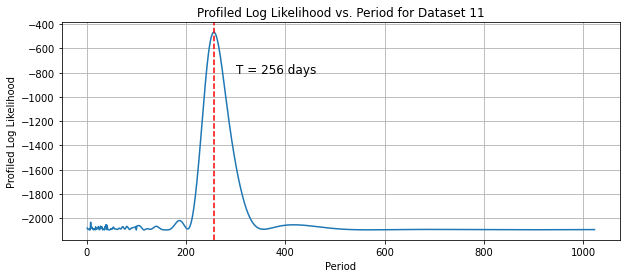

In [12]:
#DATASET 11
plt.figure(10, figsize = (10,4))

plt.plot(timestep, results_ds11)
plt.title('Profiled Log Likelihood vs. Period for Dataset 11' )
plt.xlabel('Period')
plt.ylabel('Profiled Log Likelihood')
plt.axvline(256,0, color = 'r', ls = '--')
plt.text(300, -800, 'T = 256 days', fontsize = 12)
plt.grid()
plt.show()

In [13]:
#optimizing the parameters we found from our log likelihood
mle_11 = MLE_new(time, y, sigma_y, 100, 256)

The maximum likelihood estimates for B, A_1, A_2, A_3, and A_4 respectively are: 0.0692509774622088 , 1.9661314980997608 , 2.2864804105524783 , 0.5317440171212392 & 0.6379138374843989


<ipython-input-10-1882f0440d5f>:14: RuntimeWarning: invalid value encountered in sqrt
  variance = np.sqrt(np.linalg.inv(A.T@C_inv@A))


In [14]:
# get error by profiling out all other parameters (including amplitudes)

def pro_likelihood2(T, time, y, sigma_y):
    T_0 = 100 #days 
    B = mle_11[0]
    A_1 = mle_11[1]
    A_2 = mle_11[2]
    A_3 = mle_11[3]
    A_4 = mle_11[4]
    
    Y = np.reshape(y,(len(y),1))
    A = np.column_stack([np.ones(len(time)), 
                         np.cos(2 * np.pi * time/T_0), 
                         np.sin(2 * np.pi * time/T_0), 
                         np.cos(2 * np.pi * time/T), 
                         np.sin(2 * np.pi * time/T)])

    C = np.diag(sigma_y**2)
    C_inv = np.linalg.inv(C)

    # using the pars that we have previously found and optimized
    pars = [B, A_1, A_2, A_3, A_4]

    # now plug in pars to our likelihood function
    # next step is to optimize this and plot against period to find the secondary period

    # equation 7 in data analysis recipes: fiting a model to data
    L = -1/2 * (A@pars - Y).T@C_inv@(A@pars - Y)
    
    return L[0][0]

In [15]:
new_results_ds11 = []
for i in timestep:
    new_results_ds11.append(pro_likelihood2(i, time, y, sigma_y))

In [16]:
from scipy import optimize
import pandas as pd

def parabola_fit(x, a, b, c):
    return a*x**2 + b*x + c

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [17]:
params, param_cov = optimize.curve_fit(parabola_fit, timestep[220:300], new_results_ds11[220:300])
modelfit = parabola_fit(timestep[220:300],params[0],params[1],params[2])
print(params[0], 'x^2 + ', params[1], 'x + ', params[2])

-2.4600105178480116 x^2 +  1278.4251630087756 x +  -167035.40009296965


In [18]:
1/(np.sqrt(np.abs(params[0])))

0.6375753500727976

Here, we are fitting a parabola to our data to find the error:

$ aT^{2} + bT + c$

$ 1/\sigma_{T}^{2} = a $

$ \sigma_{T} = 1/\sqrt a $

$ \sigma_{T} = 1/\sqrt|2.46| = 0.63$ days 

$ T = 256 \pm 0.63 $ days

I think my error calculation is too small probably because my model fit doesn't characterize the parabolic shape of the profile likelihood very well.

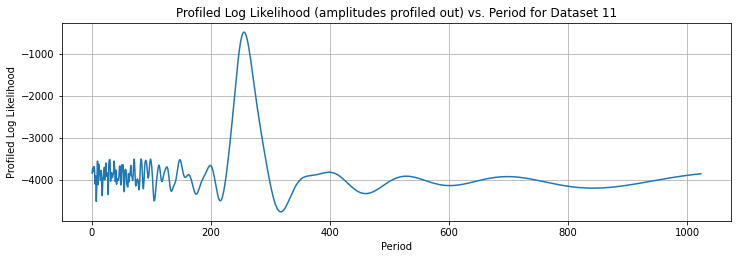

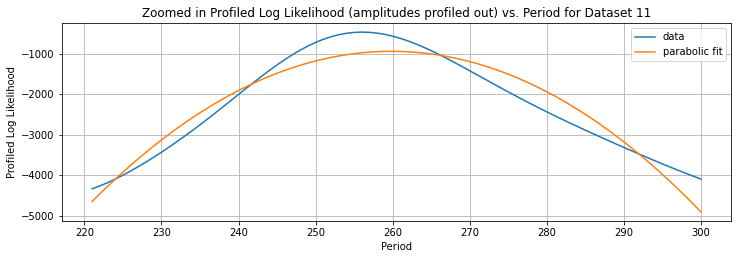

In [19]:
#DATASET 11
plt.figure(10, figsize = (12,8))
plt.subplot(2,1,1)
plt.plot(timestep, new_results_ds11)
plt.title('Profiled Log Likelihood (amplitudes profiled out) vs. Period for Dataset 11' )
plt.xlabel('Period')
plt.ylabel('Profiled Log Likelihood')
plt.grid()
plt.show()

plt.figure(10, figsize = (12,8))
plt.subplot(2,1,2)
plt.plot(timestep[220:300], new_results_ds11[220:300], label = 'data')
plt.plot(timestep[220:300], modelfit, label = 'parabolic fit')
plt.title('Zoomed in Profiled Log Likelihood (amplitudes profiled out) vs. Period for Dataset 11' )
plt.xlabel('Period')
plt.ylabel('Profiled Log Likelihood')
plt.grid()
plt.legend()
plt.show()


## Problem 2 from  https://arxiv.org/abs/1710.06068:

**In your scientific programming language of choice, write a very simple MH MCMC sampler. Sample in a single parameter $x$ and give the sampler as its density function $p(x)$ a Gaussian density with mean 2 and variance 2. (Note that variance is the *square* of the standard deviation.) Give the sampler a proposal distribution $q(x' | x)$ a Gaussian pdf for $x'$ with mean $x$ and variance 1. Initialize the sampler with $x = 0$ and run the sampler for more than $10^{4}$ steps. Plot the results as a histogram, with the true density over-plotted sensibly. The resulting plot should look something like Figure 1.**

In [20]:
# our target probability density 
# hardcode mean = 2 and variance = 2

def p(x):
    mean = 2
    variance = 2
    
    return 1 / np.sqrt(2 * np.pi * variance) * np.exp(-(x - mean)**2 / (2 * variance))

Now we want to generate samples from our distribution. Our initializing state will be $x_{k} = 0$. We now want to calculate the next state $x_{k+1}$. To do this, we need to generate a candidate $x'$ from our proposal distribution $q(x'|x_{k})$, in other words a distribution centered on $x_{k}$. We will use a normal distribution for our proposal distribution.

$x'$ | $x_{k}$ ~ Normal ($\mu = x_{k}$, $\sigma^{2}$)

***How do we accept or reject?***

Take the ratio of $\frac{P(x')}{P(x_{k})}$. Then, we will draw a uniform random number $r$ from $[0,1]$:

If ratio $> r: x_{k+1}$ <-- $x'$

else: $x_{k+1}$ <-- $x_{k}$

In [21]:
# our proposal distribution that will generate a candidate sample x'
# plug in mean = x and variance = 1

def proposal_dist(x):
    scale = 1

    return x + scale*np.random.normal()

In [22]:
# initialize state
samples_1 = [0]
steps_1 = 10**4

# implement the MH-MCMC Algorithm
for i in range(steps_1):
    # calculate x_(k+1)

    x_prime = proposal_dist(samples_1[-1]) # x_k = samples_1[-1]

    # compute likelihood ratio to accept or reject this value of x_next
    ratio = p(x_prime) / p(samples_1[-1])

    rand_num = np.random.rand()

    if ratio > rand_num:
        # ACCEPT: x_next = x_prime
        samples_1.append(x_prime)
    else:
        # REJECT/REPEAT: x_next = x_k
        samples_1.append(samples_1[-1])

<ipython-input-23-da1480b50a0c>:14: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-2.5,5.5, 0.5)
<ipython-input-23-da1480b50a0c>:15: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,0.3,0.1)


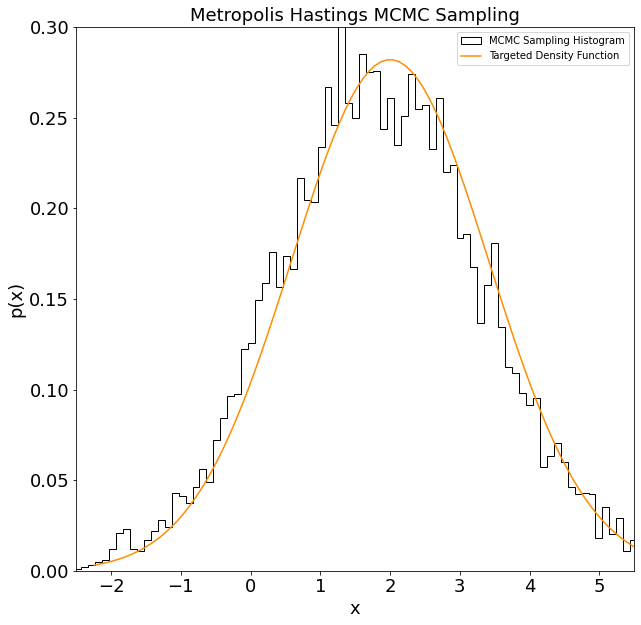

In [23]:
# let's plot our results!
plt.figure(figsize=(10,10))

# histogram of our MCMC sampling
plt.hist(samples_1, bins = 100, histtype = 'step', density=True, color = 'k', label = 'MCMC Sampling Histogram')

# overlay our true targeted probability distribution p(x)
mean = 2
sigma = np.sqrt(2)

x = np.linspace(mean - 3*sigma, mean + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, sigma), color = 'darkorange', label = 'Targeted Density Function')

plt.xlim(-2.5,5.5, 0.5)
plt.ylim(0,0.3,0.1)
plt.xlabel('x', size = 18)
plt.xticks(size = 18)
plt.ylabel('p(x)', size = 18)
plt.yticks(size = 18)
plt.title('Metropolis Hastings MCMC Sampling', size = 18)
plt.legend()
plt.show()

## Problem 4 from https://arxiv.org/abs/1710.06068:

***Re-do Problem 2 but now with an input density that is a function of two variables $(x, y)$. For the density function use two different functions.***

***(a) The first density function is a covariant two-dimensional Gaussian density with variance tensor***
$V = \left[\begin{array}{ccc} 2.0 & 1.2 \\ 1.2 & 2.0\end{array}\right]$

***(b) The second density function is a rectangular top-hat function that is uniform on
the joint constraint $3 < x < 7$ and $1 < y < 9$ and zero everywhere else. For the
proposal distribution $q(x', y' | x, y)$ a two-dimensional Gaussian density with mean
at [x, y] and variance tensor set to the two-dimensional identity matrix. Plot the two
one-dimensional histograms and also a two-dimensional scatter plot for each sampling.
Figure 3 shows the expected results for the Gaussian. Make a similar plot for the tophat.***


In [24]:
#Part A:

# our target probability density 
# hardcode mean = 2
# variance = a covariant two-dimensional tensor

def cov_gaussdensity(x,y):
    mean = np.asarray([2.0, 2.0])
    ex = np.asarray([x, y])
    variance = np.asarray([[2.0, 1.2], 
                           [1.2, 2.0]])

    return 1 / np.sqrt(np.linalg.det(2 * np.pi * variance)) * np.exp(-(1/2) * ((ex - mean).T@np.linalg.inv(variance)@(ex - mean)))



In [25]:
# our proposal distribution that will generate a candidate sample x'
# plug in mean = x and variance = 1

def proposal_dist2D(x,y):
    scale = 1

    return [x + scale*np.random.normal(), y + scale*np.random.normal()]

In [26]:
# initialize state
samples_2 = [[0,0]]

steps_2 = 10**4

# implement the 2D MH-MCMC Algorithm
for i in range(steps_2):
    # calculate x_(k+1)

    x_prime, y_prime = proposal_dist2D(*samples_2[-1]) # mean [x,y] and 2D identity matrix

    # compute likelihood ratio to accept or reject this value of x_next
    ratio = cov_gaussdensity(x_prime, y_prime)/cov_gaussdensity(*samples_2[-1])

    rand_num = np.random.rand()

    if ratio > rand_num:
        # ACCEPT: x_next = x_prime
        samples_2.append([x_prime, y_prime])
    else:
        # REJECT/REPEAT: x_next = x_k
        samples_2.append([*samples_2[-1]])

In [27]:
samples_2_arr = np.asarray(samples_2)
x_data = samples_2_arr[:,0]
y_data = samples_2_arr[:,1]

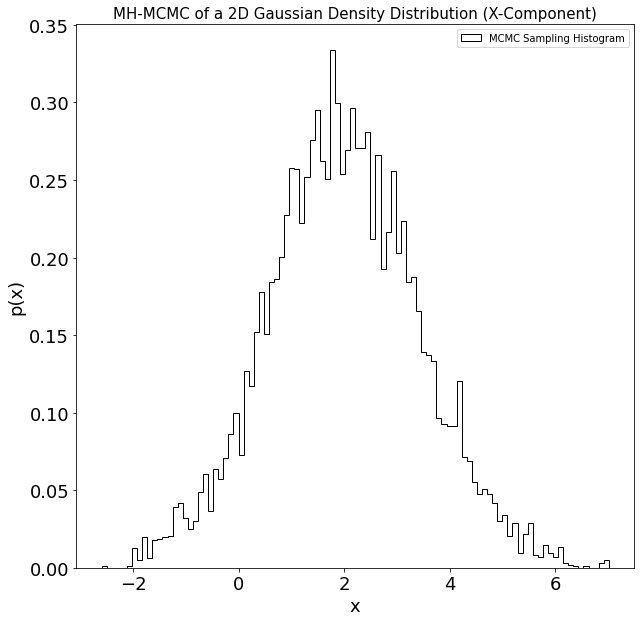

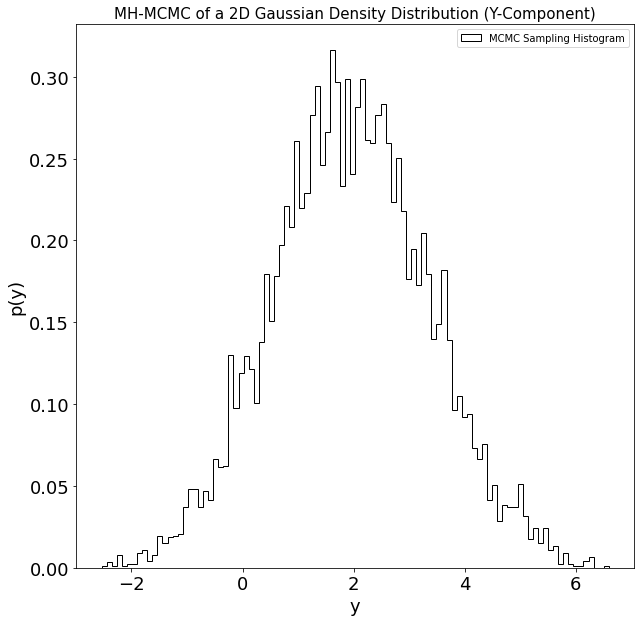

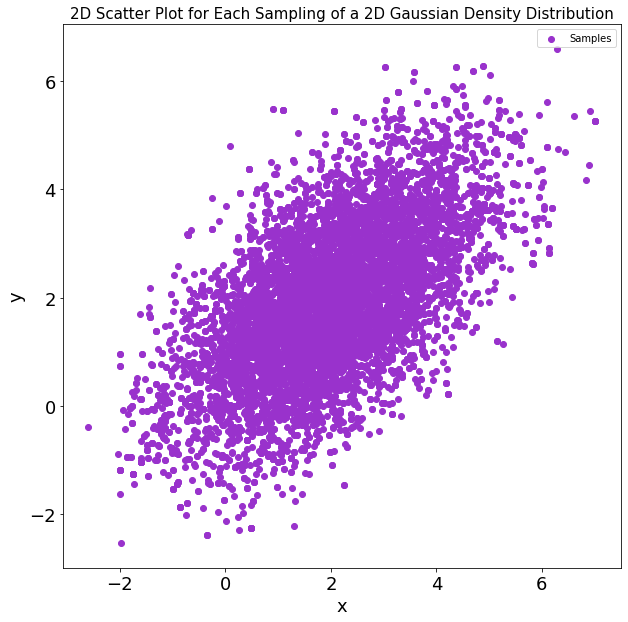

In [28]:
# let's plot our results!

# x-component histogram of our MCMC sampling
plt.figure(1, figsize=(10,10))
plt.hist(x_data, bins = 100, histtype = 'step', density=True, color = 'k', label = 'MCMC Sampling Histogram')
plt.xlabel('x', size = 18)
plt.xticks(size = 18)
plt.ylabel('p(x)', size = 18)
plt.yticks(size = 18)
plt.title('MH-MCMC of a 2D Gaussian Density Distribution (X-Component)', size = 15)
plt.legend()

# y-component histogram of our MCMC sampling
plt.figure(2, figsize=(10,10))
plt.hist(y_data, bins = 100, histtype = 'step', density=True, color = 'k', label = 'MCMC Sampling Histogram')
plt.xlabel('y', size = 18)
plt.xticks(size = 18)
plt.ylabel('p(y)', size = 18)
plt.yticks(size = 18)
plt.title('MH-MCMC of a 2D Gaussian Density Distribution (Y-Component)', size = 15)
plt.legend()

# plot a 2D scatter plot for each sampling
plt.figure(3, figsize=(10,10))
plt.scatter(x_data, y_data, color = 'darkorchid', label = 'Samples')

plt.xlabel('x', size = 18)
plt.xticks(size = 18)
plt.ylabel('y', size = 18)
plt.yticks(size = 18)
plt.title('2D Scatter Plot for Each Sampling of a 2D Gaussian Density Distribution', size = 15)
plt.legend()
plt.show()

In [29]:
# PART B:
# define a tophat function that takes in x and y

def tophat(x,y):
    if x < 3:
        return 0
    
    if x > 7:
        return 0
    
    if y < 1:
        return 0
    
    if y > 9:
        return 0
    
    return 1

In [30]:
# our proposal distribution that will generate a candidate sample x'
# plug in mean = x, y and variance = 2D identity matric

def proposal_dist2D(x,y):
    scale = 1

    return [x + scale*np.random.normal(), y + scale*np.random.normal()]
    

In [31]:
# initialize state within the region of 3 < x < 7 and 1 < y < 9
samples_3 = [[5,5]]

steps_3 = 10**4

# implement the 2D MH-MCMC Algorithm
for i in range(steps_3):
    # calculate x_(k+1)

    x_prime, y_prime = proposal_dist2D(*samples_3[-1]) # mean [x,y] and 2D identity matrix

    # compute likelihood ratio to accept or reject this value of x_next
    ratio = tophat(x_prime, y_prime)/tophat(*samples_3[-1])

    rand_num = np.random.rand()

    if ratio > rand_num:
        # ACCEPT: x_next = x_prime
        samples_3.append([x_prime, y_prime])
    else:
        # REJECT/REPEAT: x_next = x_k
        samples_3.append([*samples_3[-1]])

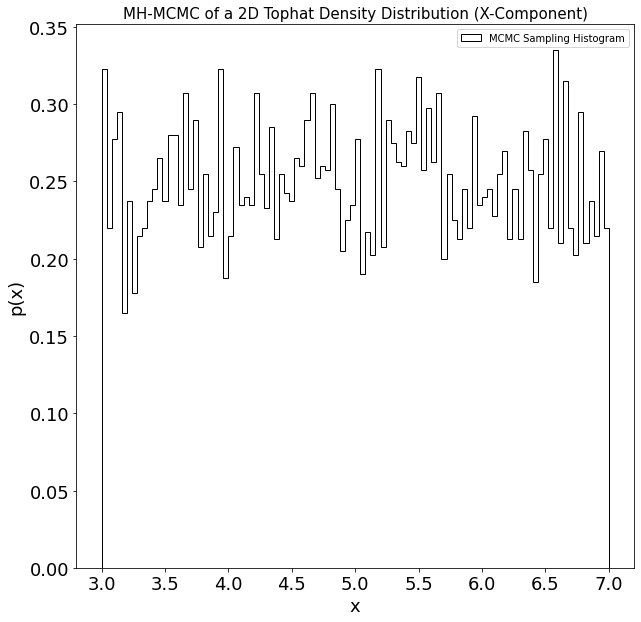

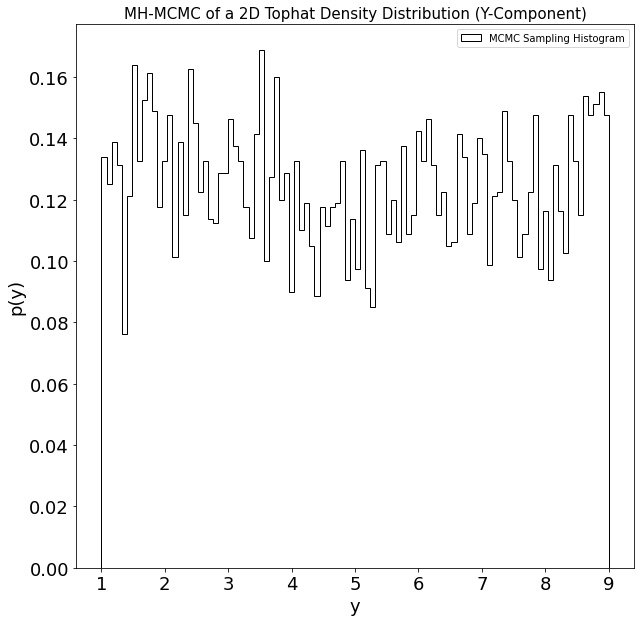

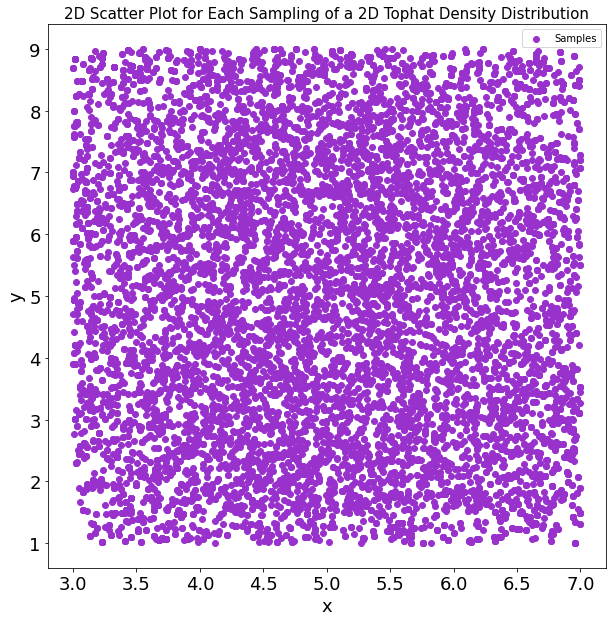

In [32]:
# let's plot our results!
samples_3_arr = np.array(samples_3)
x_data = samples_3_arr[:,0]
y_data = samples_3_arr[:,1]

# histogram of our tophat MCMC sampling (X-Component)
plt.figure(1, figsize=(10,10))
plt.hist(x_data, bins = 100, histtype = 'step', density=True, color = 'k', label = 'MCMC Sampling Histogram')
plt.xlabel('x', size = 18)
plt.xticks(size = 18)
plt.ylabel('p(x)', size = 18)
plt.yticks(size = 18)
plt.title('MH-MCMC of a 2D Tophat Density Distribution (X-Component)', size = 15)
plt.legend()

# histogram of our tophat MCMC sampling (Y-Component)
plt.figure(2, figsize=(10,10))
plt.hist(y_data, bins = 100, histtype = 'step', density=True, color = 'k', label = 'MCMC Sampling Histogram')
plt.xlabel('y', size = 18)
plt.xticks(size = 18)
plt.ylabel('p(y)', size = 18)
plt.yticks(size = 18)
plt.title('MH-MCMC of a 2D Tophat Density Distribution (Y-Component)', size = 15)
plt.legend()
plt.show()

# plot a 2D scatter plot for each sampling
plt.figure(3, figsize=(10,10))
plt.scatter(x_data, y_data, color = 'darkorchid', label = 'Samples')

plt.xlabel('x', size = 18)
plt.xticks(size = 18)
plt.ylabel('y', size = 18)
plt.yticks(size = 18)
plt.title('2D Scatter Plot for Each Sampling of a 2D Tophat Density Distribution', size = 15)
plt.legend()
plt.show()

## Problem 10 from https://arxiv.org/abs/1710.06068:

***Re-do Problem 2 but now look at convergence: Plot the $x$ chain as a function of timestep. Also split the chain into four contiguous segments (the first, second, third, and fourth quarters of the chain). In each of these four, compute the empirical mean and empirical variance of $x$. What do you conclude about convergence from these heuristics?***


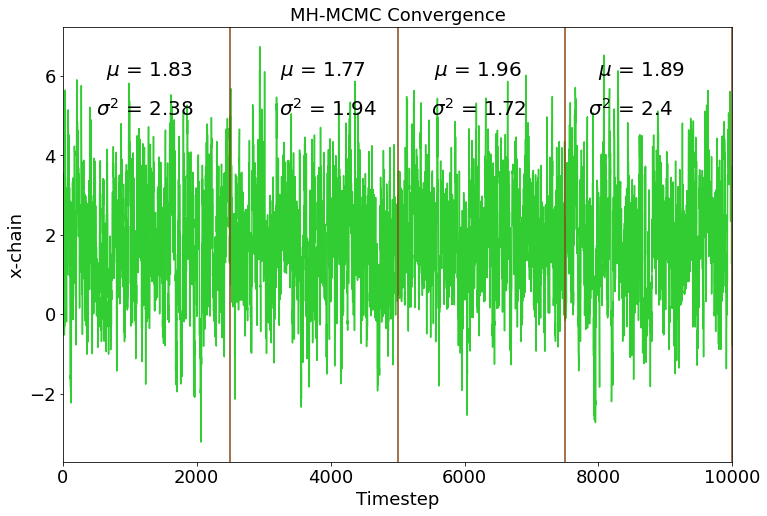

In [33]:
timestep = np.arange(0,steps_1+1)

plt.figure(figsize = (12,8))

plt.plot(timestep, samples_1, color = 'limegreen')

# splitting the chain into 4 quarters
plt.axvline(x = (steps_1+1) * 1/4, color = 'saddlebrown')
plt.axvline(x = (steps_1+1) * 2/4, color = 'saddlebrown')
plt.axvline(x = (steps_1+1) * 3/4, color = 'saddlebrown')
plt.axvline(x = (steps_1+1) * 4/4, color = 'saddlebrown')

# compute mean and variance of x in each quarter
mean_1 = np.mean(samples_1[0:2500])
var_1 = np.var(samples_1[0:2500])
plt.text(650, 6, r'$\mu$ = ' + str(np.round(mean_1,2)), fontsize = 20)
plt.text(500, 5, r'$\sigma^{2}$ = ' + str(np.round(var_1,2)), fontsize = 20)

mean_2 = np.mean(samples_1[2500:5000])
var_2 = np.var(samples_1[2500:5000])
plt.text(3250, 6, r'$\mu$ = ' + str(np.round(mean_2,2)), fontsize = 20)
plt.text(3225, 5, r'$\sigma^{2}$ = ' + str(np.round(var_2,2)), fontsize = 20)

mean_3 = np.mean(samples_1[5000:7500])
var_3 = np.var(samples_1[5000:7500])
plt.text(5550, 6, r'$\mu$ = ' + str(np.round(mean_3,2)), fontsize = 20)
plt.text(5500, 5, r'$\sigma^{2}$ = ' + str(np.round(var_3,2)), fontsize = 20)

mean_4 = np.mean(samples_1[7500:10000])
var_4 = np.var(samples_1[7500:10000])
plt.text(8000, 6, r'$\mu$ = ' + str(np.round(mean_4,2)), fontsize = 20)
plt.text(7850, 5, r'$\sigma^{2}$ = ' + str(np.round(var_4,2)), fontsize = 20)

plt.title('MH-MCMC Convergence', size = 18)
plt.xlabel('Timestep', size = 18)
plt.xticks(size = 18)
plt.xlim(0,steps_1+1)
plt.ylabel('x-chain', size = 18)
plt.yticks(size = 18)

plt.show()

The mean and variance seem to be around the same throughout all 4 quarters of the chain, so we conclude that the chain has converged to a stationary distribution similar to the target distribution.